<h3>First we import all the libraries needed and load the dataset<h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color_pallete = ['#fc5185', '#3fc1c9', '#364f6b']
sns.set_palette(color_pallete)


import numpy as np
#Import scikit-learn dataset library
from sklearn import datasets
import plotly.express as px

#Load dataset
irisdata = datasets.load_iris()
#print(irisdata)

In [2]:

iris=pd.DataFrame(irisdata.data,columns=irisdata.feature_names)
irispecies=irisdata.target
iris['Species']=irisdata.target_names[irispecies]
iris.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
print(iris.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [24]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

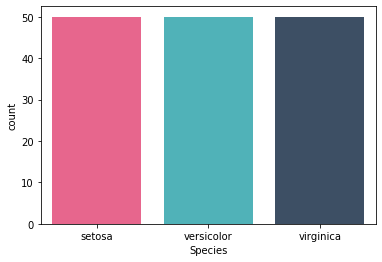

In [25]:
sns.countplot(iris["Species"],data=iris)

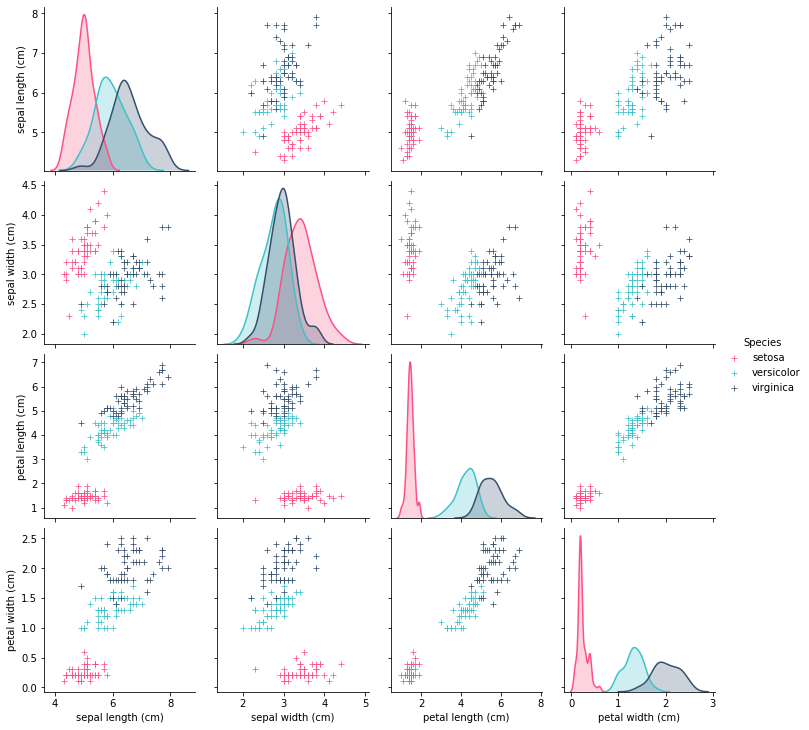

In [26]:

g = sns.pairplot(iris, hue='Species', markers='+')
plt.show()

In [27]:
px.scatter_3d(iris, x="petal length (cm)", y="petal width (cm)", z="sepal length (cm)", size="sepal width (cm)" ,
              color="Species", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})

In [28]:
px.scatter_3d(iris, x="petal length (cm)", y="petal width (cm)", z="sepal width (cm)", size="sepal length (cm)" ,
              color="Species", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})

<h4>From the above plots we can see that sentosa is diffent from other species whereas there is a overlap in versicolor and verginica</h4>

<h3>Now plotting violin plot to find the distribution of sepal length,sepal width,petal length,petal width<h3>

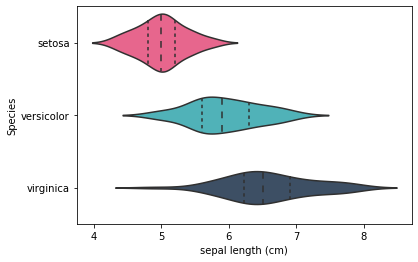

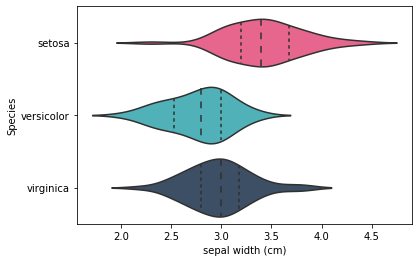

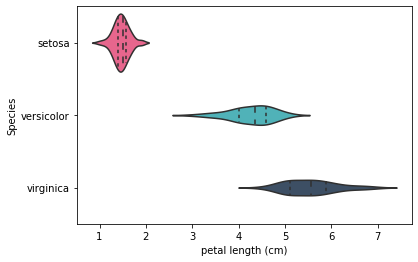

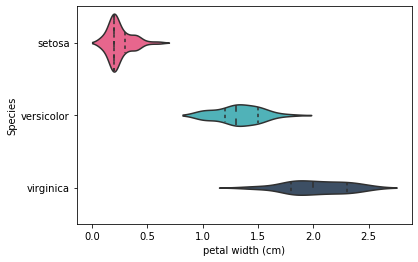

In [29]:
g = sns.violinplot(y='Species', x='sepal length (cm)', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='sepal width (cm)', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='petal length (cm)', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='petal width (cm)', data=iris, inner='quartile')
plt.show()

In [10]:
data=pd.DataFrame({
   'sepal length':irisdata.data[:,0],
  'sepal width':irisdata.data[:,1],
    'petal length':irisdata.data[:,2],
    'petal width':irisdata.data[:,3],
    'species':irisdata.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=45) # 70% training and 30% test

In [12]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

<b>LOGISTIC REGRESSION<b>

In [13]:
from sklearn.linear_model import LogisticRegression
logre =  LogisticRegression()
logre.fit(X_train, y_train)
predictions = logre.predict(X_test)

print("Accuracy of logistic regression is",metrics.accuracy_score(y_test, predictions)*100)


Accuracy of logistic regression is 95.55555555555556


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [14]:
species_log=logre.predict([[4,2,1,0.2]])[0]

irisdata.target_names[species_log]


'setosa'

<b>KNN<b>

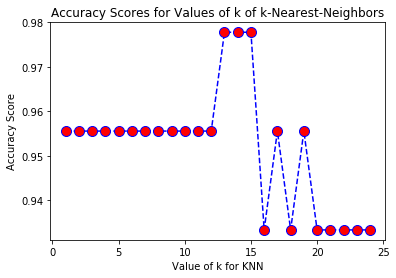

In [15]:
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1,25))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [16]:
print(scores)


[0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]


In [17]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_test , y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [18]:
print("Accuracy of KNN is",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of KNN is 93.33333333333333


In [19]:

species_knn=knn.predict([[4, 2, 5, 1]])
irisdata.target_names[species_knn]

array(['versicolor'], dtype='<U10')

<b>RANDOM FOREST <b>

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

pred_rand=clf.predict(X_test)
print("Accuracy of Random Forest is:",metrics.accuracy_score(y_test, pred_rand)*100)

Accuracy of Random Forest is: 95.55555555555556


In [21]:
species_rand=clf.predict([[3, 3.4, 6, 1.4]])
irisdata.target_names[species_rand]

array(['virginica'], dtype='<U10')

<b>SUPPORT VECTOR MACHINE<b>

In [22]:
from sklearn.svm import SVC
model=SVC(C=100,kernel='linear',gamma='auto')
model.fit(X_train, y_train)
pred=model.predict(X_test)
print("Accuracy of SVC is",metrics.accuracy_score(y_test, pred)*100)
print()

Accuracy of SVC is 97.77777777777777



In [23]:
species_svc=clf.predict([[3, 3.4, 6, 1.4]])
irisdata.target_names[species_svc]

array(['virginica'], dtype='<U10')

<h4>Out of all the algorithm SVC gave a maximum accuracy of 97%<h4>
